In [1]:
# Creating a classification model to predict if the client will subscribe (yes/no) a term deposit
# using Bank Marketing Data Set from UCI Machine Learning Repository that can be finded: 
# http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [4]:
#----------------------------------------------------------------------------------------#
#------------------------ Installing and charging Librarys ------------------------------#
#----------------------------------------------------------------------------------------#

# Uncommit if have not this packages installed yet

#install.packages('tidyr',dependencies = T)
#install.packages('purrr',dependencies = T)
#install.packages('ggplot2',dependencies = T)
#install.packages('caret',dependencies = T)
#install.packages('rpart',dependencies = T)
#install.packages('rpart.plot',dependencies = T)
#install.packages('randomForest',dependencies = T)
#install.packages('dplyr',dependencies = T)
#install.packages('sampling',dependencies = T)
#install.packages('devtools',dependencies = T)
#install.packages('ggpubr',dependencies = T)
#install.packages('tidyverse',dependencies = T)
#install.packages('pROC',dependencies = T)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rex’, ‘praise’, ‘covr’, ‘gapminder’, ‘testthat’

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ini’, ‘checkmate’, ‘zoo’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘clisymbols’, ‘desc’, ‘gh’, ‘git2r’, ‘rprojroot’, ‘e1071’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘data.table’, ‘htmlTable’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘gdtools’, ‘usethis’, ‘SparseM’, ‘MatrixModels’, ‘classInt’, ‘units’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘vdiffr’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘svglite’

Warning message in install.packages("ggplot2", dependencies = T):
“installation of package ‘units’ had non-zero exit status”Warning message in install.packages("ggplot2", dependencies = T):
“installation of package ‘rgeos’ had no

In [5]:
library(tidyr) # visualization
library(purrr) # visualization
library(ggplot2) # visualization
library(caret) # visualization of results
library(rpart) # decision tree model
library(rpart.plot) # visualization
library(randomForest) # Random Forest model
library(dplyr) # atribute selection
library(sampling) # stratfied samples
library(devtools) # import functions from github
library(ggpubr) # visualization
library(tidyverse) # manipulation
library(pROC) # ROC curve and AUC

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘sampling’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────

In [14]:
#----------------------------------------------------------------------------------------#
#--- Importing dataset, dooing simples analyses and creating the first model ------------#
#----------------------------------------------------------------------------------------#

# Importing the dataset from my github: https://raw.githubusercontent.com/wellingtsilvdev/datasets/master/bank-full.csv
bank <- read.csv('https://raw.githubusercontent.com/wellingtsilvdev/datasets/master/bank-full.csv',header = T,sep = ';')

head(bank) # seeing the first 5 rows

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [15]:
# removing duration atribute because: 
# this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the
# call y is obviously known. Thus, this input should only be included for benchmark purposes
# and should be discarded if the intention is to have a realistic predictive model.

bank <- select(bank,-c('duration')) # removing 'duration' atribute

head(bank) # seeing the first 5 rows

age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no


In [16]:
str(bank) # data structure

'data.frame':	45211 obs. of  16 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : Factor w/ 4 levels "failur

In [17]:
summary(bank) # verifying missing values

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 default        balance       housing      loan            contact     
 no :44396   Min.   : -8019   no :20081   no :37967   cellular :29285  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   telephone: 2906  
             Median :   448                           unknown  :13020  
             Mean   :  1362                                            
             3rd Qu.:  1428                                            


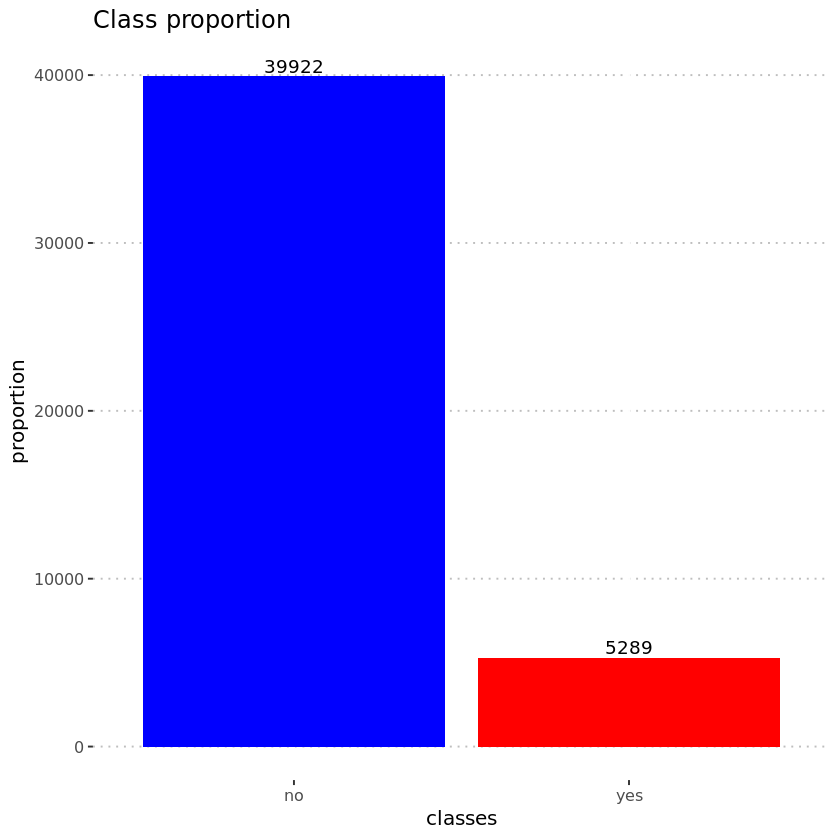

In [18]:
#------------ Calculating class proportion and ploting into graphic bars

countt <- data.frame(0) # creating a dataframe to storage classes frequency
names(countt) <- 'proportion' #naming dataframe column

# Creaing a loop to count yes and no categories
y = 0
n = 0
for(i in bank$y){
  if(i=="yes"){
    y=y+1
  }
  if(i=="no"){
    n=n+1
  }
}
countt[1,] <- n # storaging no class
countt[2,] <- y # storaging yes class

# converting indexes in a new column
row.names(countt) <- c('no','yes')
countt['classes'] <- row.names(countt)

row.names(countt) <- NULL # removing indexes

# Ploting a bar graphic with class proportion
ggplot(countt, aes(x = classes, y = proportion)) +
  geom_bar(fill = c('blue','red'), stat = "identity") +
  geom_text(aes(label=proportion), vjust = -0.3) +
  ggtitle('Class proportion')+
  theme_pubclean()

In [19]:
#---------------------------------------------------------------------------------------------------#
#--------------------- Creating the first model using Decision Tree Classification -----------------#
#---------------------------------------------------------------------------------------------------#

# We have here a ambalance class problem, to solve this, let's use Undersampling 
# method to create a stratifyed sample to solve this problem with 4500 from class yes and 4500 from class 

# spliting our data set into train and test
set.seed(244)
sampl <- strata(bank,'y',c(4500,4500),'srswr')

samplee <- sample(2,9000,replace = T,prob = c(0.5,0.5))

sampl_train <- sampl[samplee==1,]
sampl_test <- sampl[samplee==2,]

training <- bank[sampl_train$ID_unit,]
testing <- bank[sampl_test$ID_unit,]

print(summary(training$y))
print(summary(testing$y))

  no  yes 
2259 2232 
  no  yes 
2241 2268 


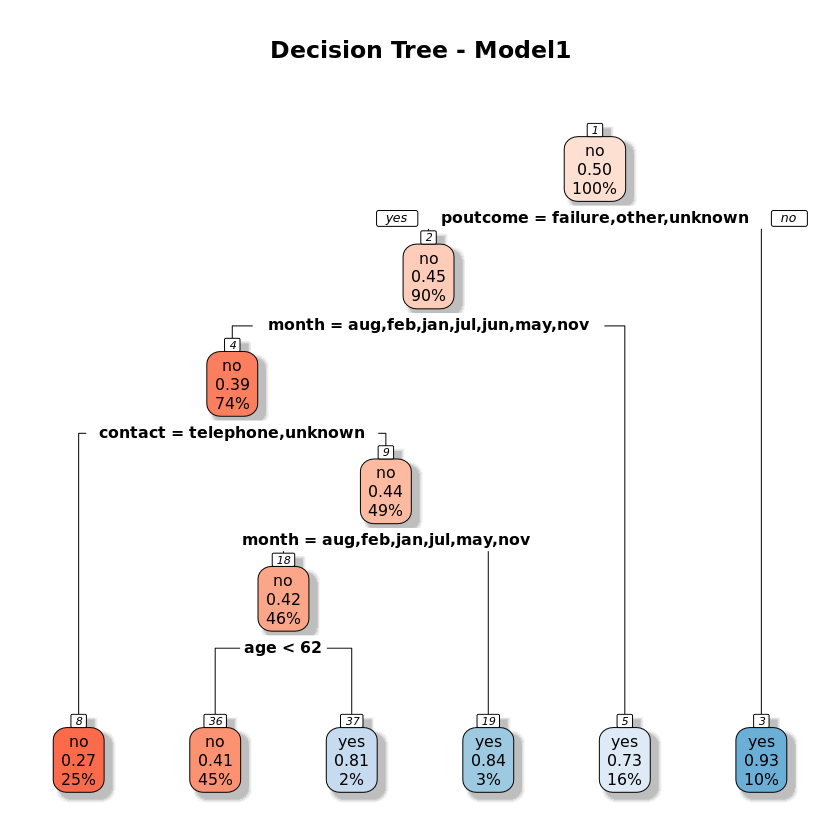

In [20]:
# creating the model1
tree1 <- rpart(y ~.,training,method = 'class')

# ploting the tree
rpart.plot(tree1,box.palette = 'RdBu'
           ,shadow.col = 'gray'
           ,nn=TRUE,main='Decision Tree - Model1')

In [21]:
#-----------realizing prediction on training database
pred <- predict(tree1,training)
pred <- as.data.frame(pred)

# converting percentagens predicted into the classes
training$pred <- ifelse(pred$yes>pred$no,'yes','no')
training$pred <- as.factor(training$pred)

# confusionmatrix and results
confusion <- confusionMatrix(training$y,training$pred)
print('Confusion matrix')
print(confusion)

accuracy <- confusion$overall[1]
paste('accuracy: ',accuracy)

[1] "Confusion matrix"
Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  2000  259
       yes 1118 1114
                                          
               Accuracy : 0.6934          
                 95% CI : (0.6797, 0.7069)
    No Information Rate : 0.6943          
    P-Value [Acc > NIR] : 0.5587          
                                          
                  Kappa : 0.3853          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6414          
            Specificity : 0.8114          
         Pos Pred Value : 0.8853          
         Neg Pred Value : 0.4991          
             Prevalence : 0.6943          
         Detection Rate : 0.4453          
   Detection Prevalence : 0.5030          
      Balanced Accuracy : 0.7264          
                                          
       'Positive' Class : no              
 

[1] "accuracy:  0.693386773547094"

In [22]:
#------------ realizing prediction on testing database
pred <- predict(tree1,testing)
pred <- as.data.frame(pred)

# converting percentagens predicted into the classes
testing$pred <- ifelse(pred$yes>pred$no,'yes','no')
testing$pred <- as.factor(testing$pred)

In [23]:
# Importing draw_confusion_matrix.R function to plot confusion matrix results finded in:
# https://github.com/wellingtsilvdev/codes-with-real-utilities/commit/1e7cc00ce21b2edd29922de868189bf9779a5b57

source_url('https://github.com/wellingtsilvdev/codes-with-real-utilities/blob/master/draw_confusion_matrix.R?raw=TRUE') # calling travel function

SHA-1 hash of file is e1ed0430574ed2c1b072fb80f9bc191e23ba3236


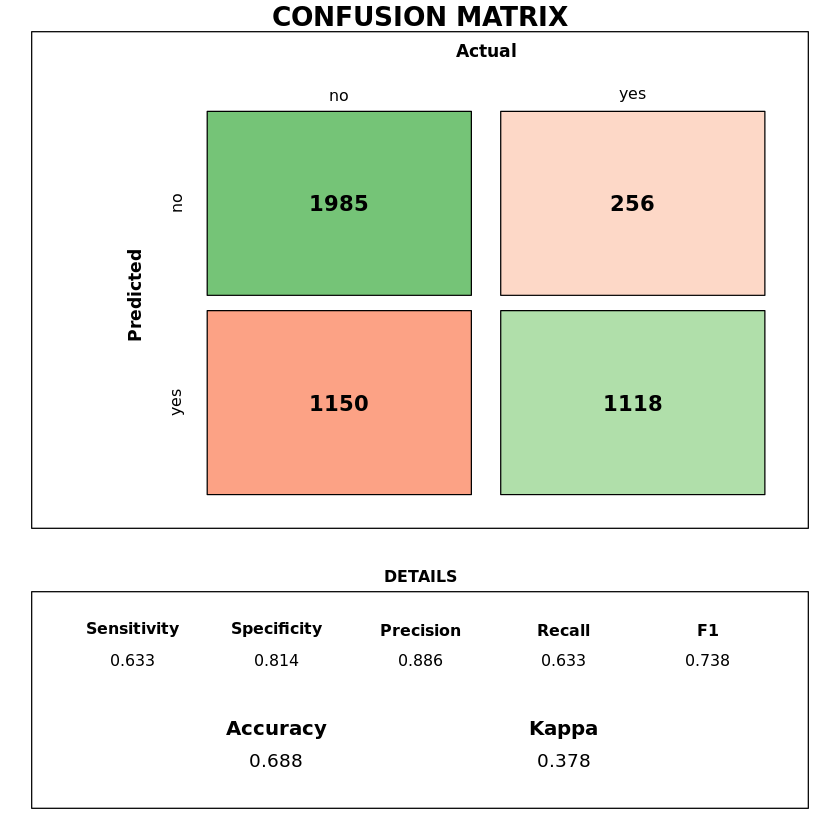

In [24]:
# confusionmatrix and results
confusion1 <- confusionMatrix(testing$y,testing$pred)
accuracy_tree1 <- confusion1$overall[1]
draw_confusion_matrix(confusion1)

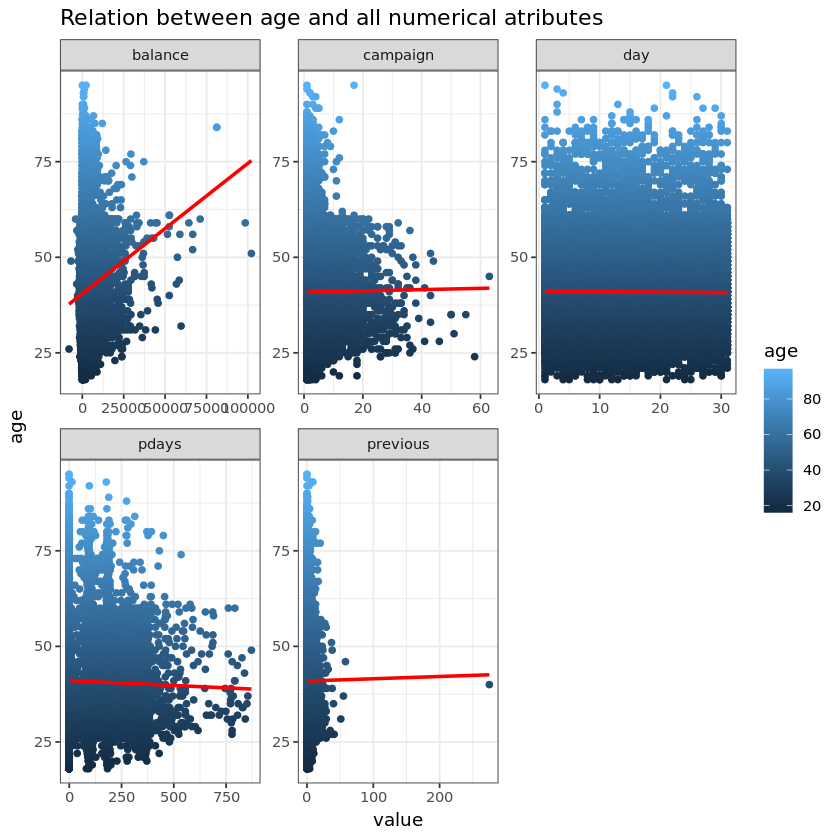

In [25]:
#----------------------------------------------------------------------------------------#
#------------------------------------ Visualization -------------------------------------#
#----------------------------------------------------------------------------------------#

#----------- Ploting a the relation between age and all numerical atributes
bank %>%
  keep(is.numeric) %>%  # selecting numeric columns
  gather(-age, key = "var", value = "value") %>% # creating a dictionare with our variables and their values and drooping age atribute
  ggplot(aes(x = value, y = age, color = age)) +
  geom_point() +
  geom_smooth(method = "lm",col ='red', se = FALSE)+
  ggtitle('Relation between age and all numerical atributes')+
  facet_wrap(~ var, scales = "free") +
  theme_bw()

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

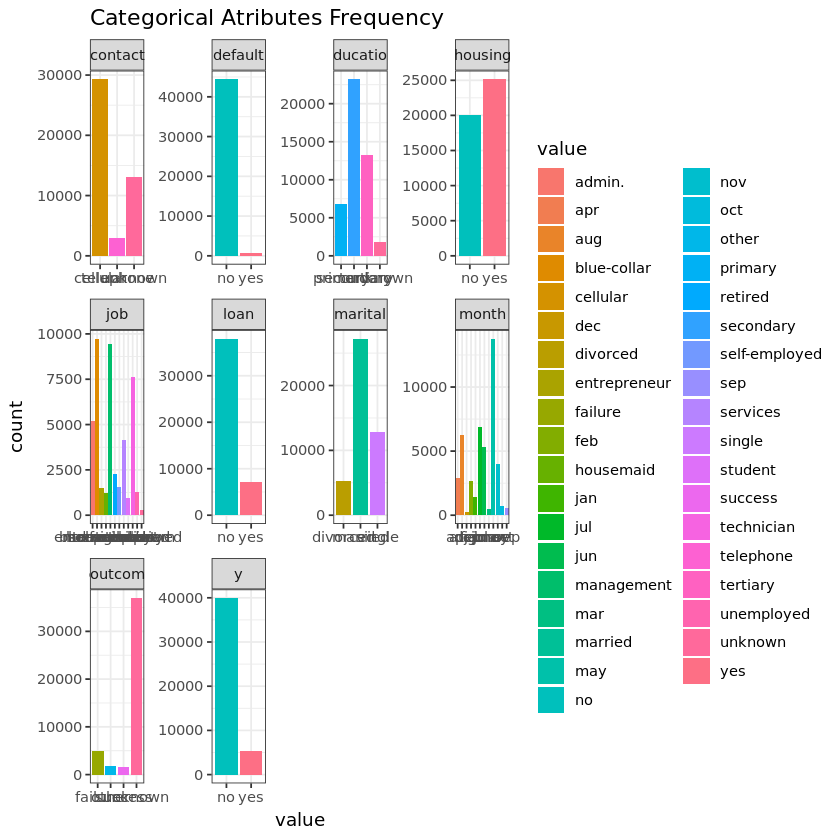

In [26]:
#------------ Ploting Categorical Atributes Frequency
bank %>%
  keep(is.factor) %>% # selecting categorical columns from bank dataset
  gather() %>% # creating a dictionare with our atributes and their categories
  ggplot(aes(value,fill = value)) +
  geom_bar()+
  ggtitle('Categorical Atributes Frequency')+
  facet_wrap(~ key, scales = "free") +
  theme_bw()

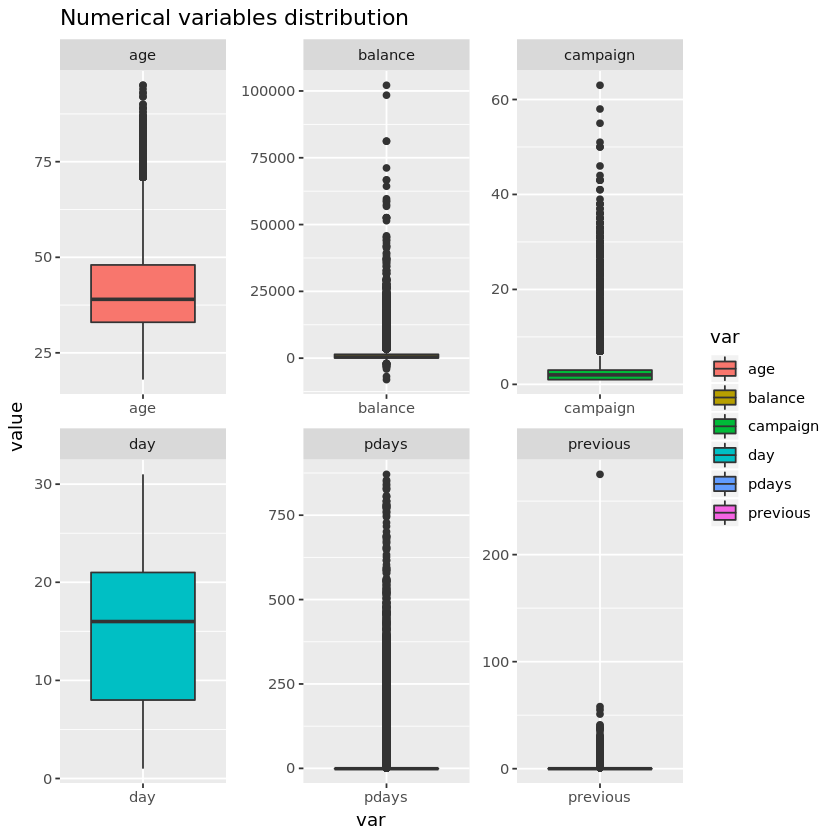

In [27]:
#----------- Boxploting numerical variables
bank %>%
  keep(is.numeric) %>%
  gather(key = "var", value = "value") %>%
  ggplot(aes(x=var, y=value)) + 
  geom_boxplot(aes(fill=var))+
  facet_wrap( ~ var, scales="free")+
  ggtitle('Numerical variables distribution')

In [28]:
#---------------------------------------------------------------------------------------------------#
#-------------------------------------- Treating Variables -----------------------------------------#
#---------------------------------------------------------------------------------------------------#

bank %>% keep(is.numeric) %>% summary() # seeing a summary of numerical variables

# logging our numerical variables
for(i in 1:dim(bank)[2]){
  if(is.numeric(bank[,i])==T){
    bank[,i] <- log(bank[,i])
  }
}

      age           balance            day           campaign     
 Min.   :18.00   Min.   : -8019   Min.   : 1.00   Min.   : 1.000  
 1st Qu.:33.00   1st Qu.:    72   1st Qu.: 8.00   1st Qu.: 1.000  
 Median :39.00   Median :   448   Median :16.00   Median : 2.000  
 Mean   :40.94   Mean   :  1362   Mean   :15.81   Mean   : 2.764  
 3rd Qu.:48.00   3rd Qu.:  1428   3rd Qu.:21.00   3rd Qu.: 3.000  
 Max.   :95.00   Max.   :102127   Max.   :31.00   Max.   :63.000  
     pdays          previous       
 Min.   : -1.0   Min.   :  0.0000  
 1st Qu.: -1.0   1st Qu.:  0.0000  
 Median : -1.0   Median :  0.0000  
 Mean   : 40.2   Mean   :  0.5803  
 3rd Qu.: -1.0   3rd Qu.:  0.0000  
 Max.   :871.0   Max.   :275.0000  

Warning message in log(bank[, i]):
“NaNs produced”Warning message in log(bank[, i]):
“NaNs produced”

In [29]:
bank %>% keep(is.numeric) %>% summary() # verifying

      age           balance            day           campaign     
 Min.   :2.890   Min.   :  -Inf   Min.   :0.000   Min.   :0.0000  
 1st Qu.:3.497   1st Qu.: 4.984   1st Qu.:2.079   1st Qu.:0.0000  
 Median :3.664   Median : 6.295   Median :2.773   Median :0.6931  
 Mean   :3.679   Mean   :  -Inf   Mean   :2.562   Mean   :0.7068  
 3rd Qu.:3.871   3rd Qu.: 7.375   3rd Qu.:3.045   3rd Qu.:1.0986  
 Max.   :4.554   Max.   :11.534   Max.   :3.434   Max.   :4.1431  
                 NA's   :3766                                     
     pdays          previous    
 Min.   :0.00    Min.   : -Inf  
 1st Qu.:4.89    1st Qu.: -Inf  
 Median :5.27    Median : -Inf  
 Mean   :5.23    Mean   : -Inf  
 3rd Qu.:5.79    3rd Qu.: -Inf  
 Max.   :6.77    Max.   :5.617  
 NA's   :36954                  

In [30]:
# Importing travel.R function to remove and replace missing values finded in:
# https://github.com/wellingtsilvdev/codes-with-real-utilities/commit/2ac247fd0899d264148022b7ee1ecffcddaebaaa

source_url('https://github.com/wellingtsilvdev/codes-with-real-utilities/blob/master/travel.R?raw=TRUE') # calling travel function

SHA-1 hash of file is 84e4a9ab320d6e1a6125d22c7a26f98bfd59fd81


In [31]:
bank <- travel(bank,element = 0,last.na = T,first_row.na = T) # replacing missing values


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [32]:
bank %>% keep(is.numeric) %>% summary() # verifying

      age           balance            day           campaign     
 Min.   :2.890   Min.   : 0.000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:3.497   1st Qu.: 5.389   1st Qu.:2.079   1st Qu.:0.0000  
 Median :3.664   Median : 6.436   Median :2.773   Median :0.6931  
 Mean   :3.679   Mean   : 6.288   Mean   :2.562   Mean   :0.7068  
 3rd Qu.:3.871   3rd Qu.: 7.442   3rd Qu.:3.045   3rd Qu.:1.0986  
 Max.   :4.554   Max.   :11.534   Max.   :3.434   Max.   :4.1431  
     pdays          previous     
 Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.000   Median :0.0000  
 Mean   :2.433   Mean   :0.3811  
 3rd Qu.:5.220   3rd Qu.:0.6931  
 Max.   :6.770   Max.   :5.6168  

In [33]:
# Treating pdays:  number of days that passed by after the client was last contacted from a previous campaign
# -1 means that this client was never contacted before

summary(bank$pdays)

bank$pasdays <- ifelse(bank$pdays== 0,'f_contact',NA) # transforming pdays into categorical
bank$pasdays <- ifelse(bank$pdays!= 0 & bank$pdays <=2.433,'cont2',bank$pasdays)
bank$pasdays <- ifelse(bank$pdays!= 0 & bank$pdays >5.22,'cont3',bank$pasdays)
bank$pasdays <- as.factor(bank$pasdays)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.433   5.220   6.770 

In [34]:
# Treating campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
summary(bank$campaign)

bank$campaign <- ifelse(bank$campaign>1.0986,1.0986,bank$campaign) # removing outlayers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.6931  0.7068  1.0986  4.1431 

In [35]:
# Treating age
summary(bank$age)

bank$age_cat <-  ifelse(bank$age>=3.871,'old',NA) # converting to categorical
bank$age_cat <-  ifelse(bank$age<=3.497,'young',bank$age_cat)
bank$age_cat <-  ifelse(bank$age>3.497 & bank$age<3.871,'mature',bank$age_cat)
bank$age_cat <- as.factor(bank$age_cat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.890   3.497   3.664   3.679   3.871   4.554 

In [36]:
# Treating previous: previous: number of contacts performed before this campaign and for this client (numeric)
summary(bank$previous)

bank$cont_before <- ifelse(bank$previous==0,'no','yes')
bank$cont_before <- as.factor(bank$cont_before)

bank <- travel(bank,element = 0,last.na = T,first_row.na = T) # replacing missing values

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3811  0.6931  5.6168 

In [37]:
#---------------------------------------------------------------------------------------------------#
#--------------------- Creating the second model using Decision Tree Classification -----------------#
#---------------------------------------------------------------------------------------------------#

# We have here a ambalance class problem, to solve this, let's use Undersampling 
# method to create a stratifyed sample to solve this problem with 4500 from class yes and 4500 from class 

# spliting our data set into train and test
set.seed(244)
sampl <- strata(bank,'y',c(4500,4500),'srswr')
  
samplee <- sample(2,9000,replace = T,prob = c(0.5,0.5))
  
sampl_train <- sampl[samplee==1,]
sampl_test <- sampl[samplee==2,]
  
training <- bank[sampl_train$ID_unit,]
testing <- bank[sampl_test$ID_unit,]
  
print(summary(training$y))
print(summary(testing$y))

  no  yes 
2259 2232 
  no  yes 
2241 2268 


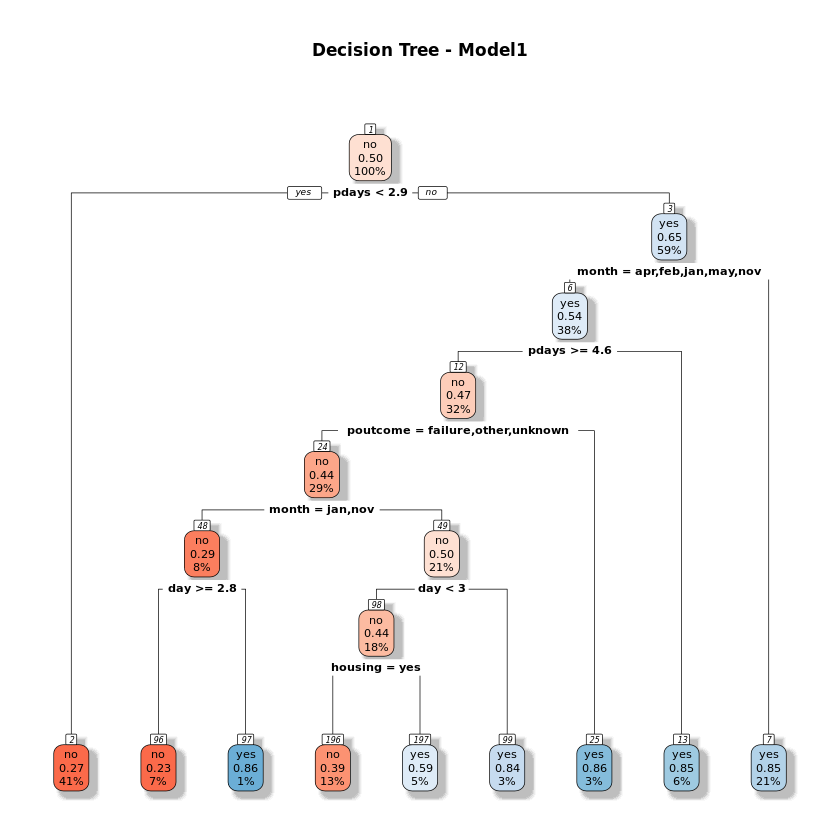

In [38]:
# creating the model
tree2 <- rpart(y ~.,training,method = 'class')
  
# ploting the tree
rpart.plot(tree2,box.palette = 'RdBu'
            ,shadow.col = 'gray'
            ,nn=TRUE,main='Decision Tree - Model1')

In [39]:
#-----------realizing prediction on training database
pred <- predict(tree2,training)
pred <- as.data.frame(pred)
  
# converting percentagens predicted into the classes
training$pred <- ifelse(pred$yes>pred$no,'yes','no')
training$pred <- as.factor(training$pred)
  
# confusionmatrix and results
confusion <- confusionMatrix(training$y,training$pred)
print('Confusion Matrix:')
print(confusion)
  
accuracy <- confusion$overall[1]
paste('accuracy: ',accuracy)

[1] "Confusion Matrix:"
Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1937  322
       yes  808 1424
                                         
               Accuracy : 0.7484         
                 95% CI : (0.7354, 0.761)
    No Information Rate : 0.6112         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4961         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7056         
            Specificity : 0.8156         
         Pos Pred Value : 0.8575         
         Neg Pred Value : 0.6380         
             Prevalence : 0.6112         
         Detection Rate : 0.4313         
   Detection Prevalence : 0.5030         
      Balanced Accuracy : 0.7606         
                                         
       'Positive' Class : no             
                    

[1] "accuracy:  0.748385660209308"

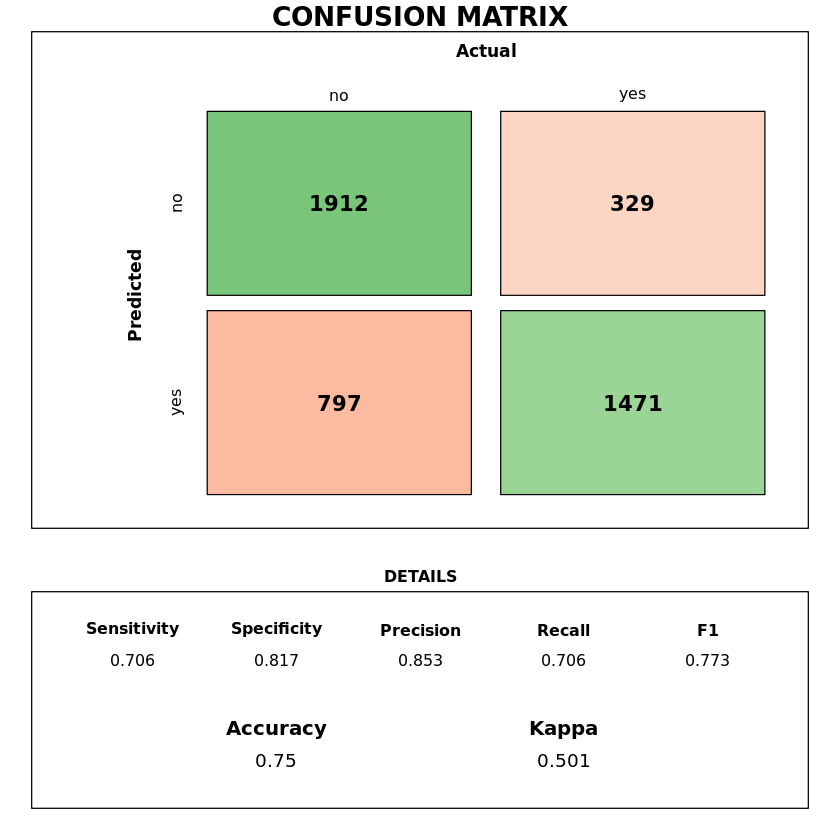

In [40]:
#------------ realizing prediction on testing database
pred <- predict(tree2,testing)
pred <- as.data.frame(pred)
  
# converting percentagens predicted into the classes
testing$pred <- ifelse(pred$yes>pred$no,'yes','no')
testing$pred <- as.factor(testing$pred)
  
# confusionmatrix and results
confusion2 <- confusionMatrix(testing$y,testing$pred)
accuracy_tree2 <- confusion2$overall[1] # saving accuracy
draw_confusion_matrix(confusion2)

# A GREAT improvement of our accuracy! Let's test with a random forest

In [41]:
#---------------------------------------------------------------------------------------------------#
#---------------------- Creating the third model using a random forest -----------------------------#
#---------------------------------------------------------------------------------------------------#

# We have here a ambalance class problem, to solve this, let's use Undersampling 
# method to create a stratifyed sample to solve this problem with 4500 from class yes and 4500 from class 

# spliting our data set into train and test
set.seed(244)
sampl <- strata(bank,'y',c(4500,4500),'srswr')

samplee <- sample(2,9000,replace = T,prob = c(0.5,0.5))

sampl_train <- sampl[samplee==1,]
sampl_test <- sampl[samplee==2,]

training <- bank[sampl_train$ID_unit,]
testing <- bank[sampl_test$ID_unit,]

print(summary(training$y))
print(summary(testing$y))

  no  yes 
2259 2232 
  no  yes 
2241 2268 


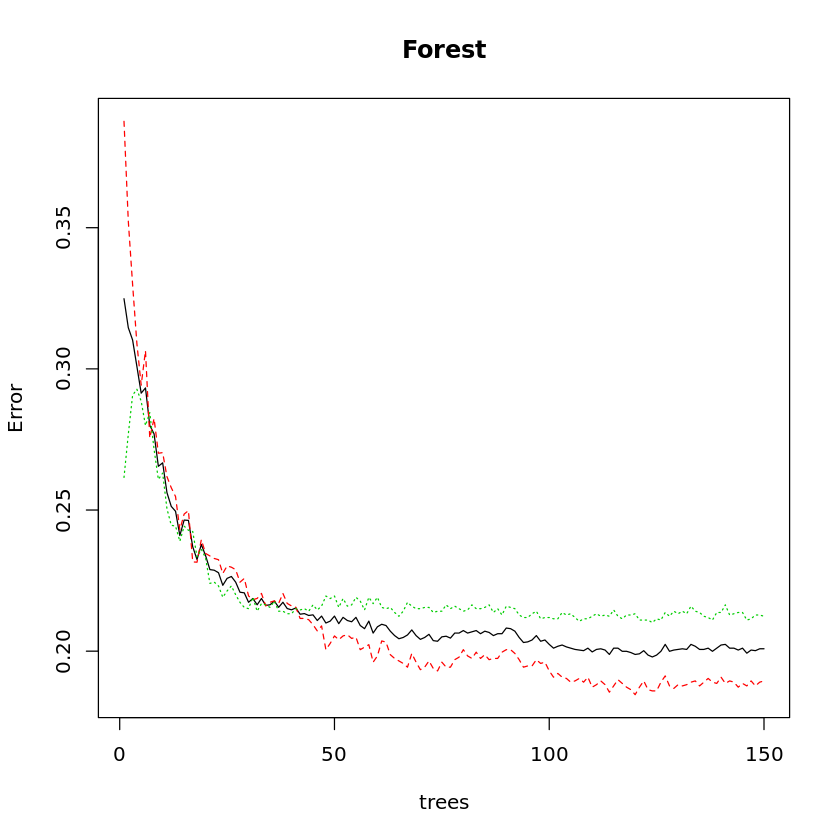

In [42]:
# creating the model
set.seed(244)
forest <- randomForest(y ~.,training,ntree=150,importance=T)

# Ploting the model
plot(forest,main='Forest')

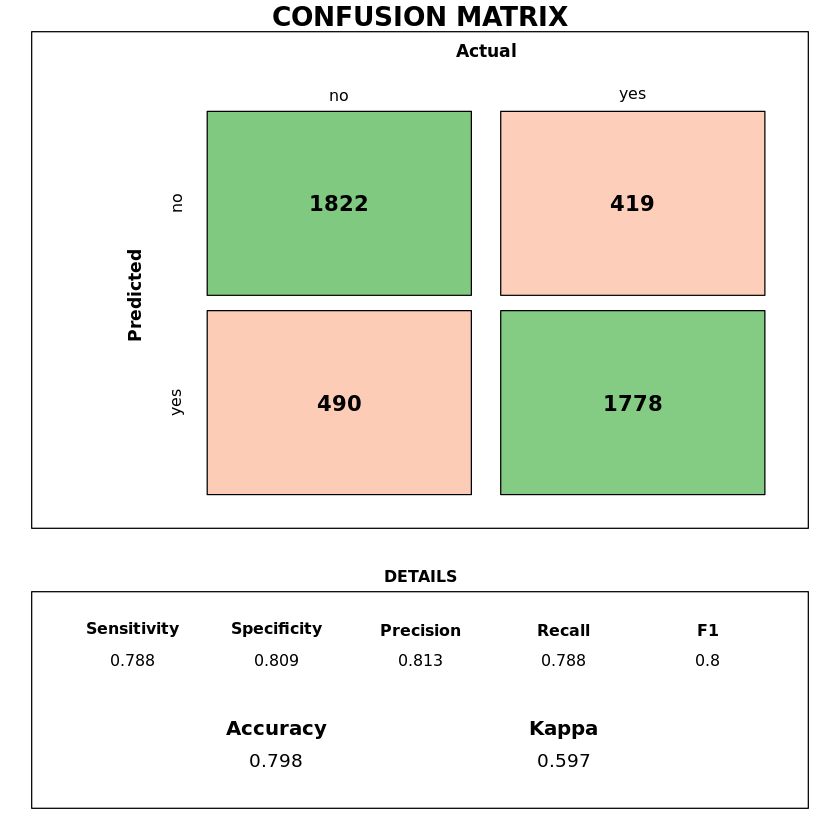

In [43]:
# The prediction of a random forest into train dataset will be close to 100%, 
# lets analyse the test accuracy

#------------ realizing prediction on testing database
pred <- predict(forest,testing)
pred <- as.factor(pred)

# creating the confusion matrix
confusion_forest <- confusionMatrix(testing$y,pred)
draw_confusion_matrix(confusion_forest) # ploting results

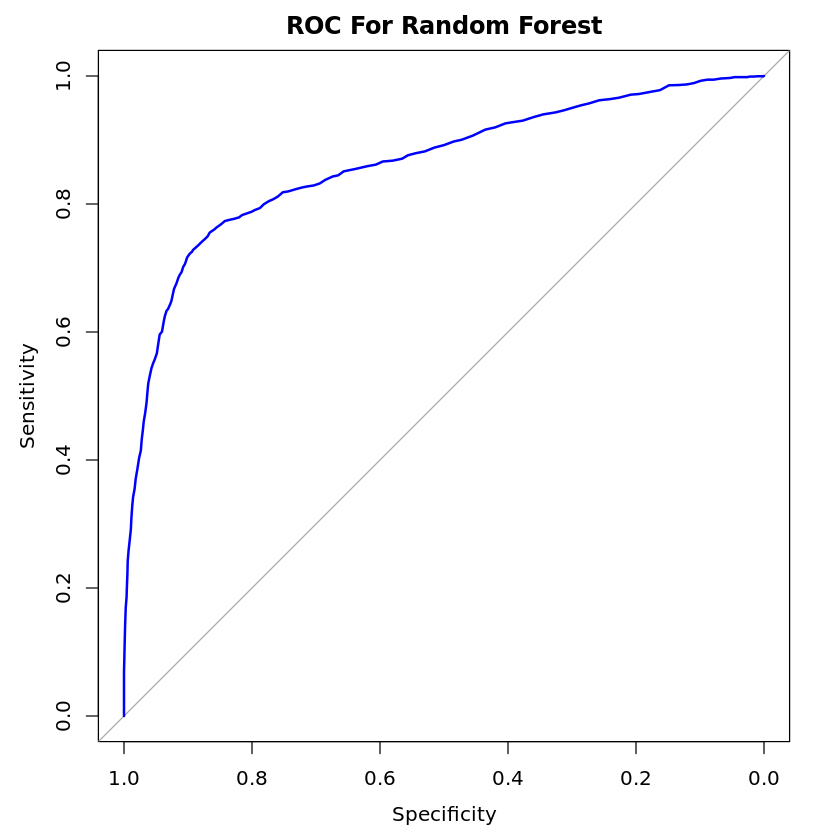

In [44]:
#------------ realizing prediction using type 'prob' to analyse ROC curve and AUC
pred <- predict(forest,testing,type='prob') # predicting

ROC_rf <- roc(testing$y, pred[,2])

ROC_rf_auc <- auc(ROC_rf)

plot(ROC_rf, col = "blue", main = "ROC For Random Forest") #ploting the curve

In [45]:
 # seeing AUC
AUC <- paste("Area under curve of random forest: ", round(ROC_rf_auc,4)*100,"%")
AUC

[1] "Area under curve of random forest:  86.16 %"

In [46]:
# With a good treatemant and a emsemble model we improve our accuracy from 0.69% to 79%
# a GREAT improvment, seeing this results the random forest model was showed much more accuratly and a AUC of 86%